In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import lagrange,CubicSpline,CubicHermiteSpline
from scipy import optimize
#no entiendo la ecuación


In [2]:
#2
url = 'https://raw.githubusercontent.com/hernansalinas/Curso_Metodos_Computacionales/main/Entregas/Parciales/Parcial1/dataset/Temperature_Bogota_Barcelona.csv' 
df = pd.read_csv(url)
df = df.drop(columns = ['Unnamed: 0','Month','Day'])
df.head()

,Year,City,AvgTemperature
0,1995,Barcelona,62.019178
1,1995,Bogota,54.963014
2,1996,Barcelona,61.125956
3,1996,Bogota,55.083333
4,1997,Barcelona,62.612329


In [3]:
c = (df['AvgTemperature'] -32) / 1.8
df = df.assign(AvgTempCelcius = c)
df.head()

,Year,City,AvgTemperature,AvgTempCelcius
0,1995,Barcelona,62.019178,16.677321
1,1995,Bogota,54.963014,12.757230
2,1996,Barcelona,61.125956,16.181087
3,1996,Bogota,55.083333,12.824074
4,1997,Barcelona,62.612329,17.006849


Text(0, 0.5, 'Temperatura(C°)')

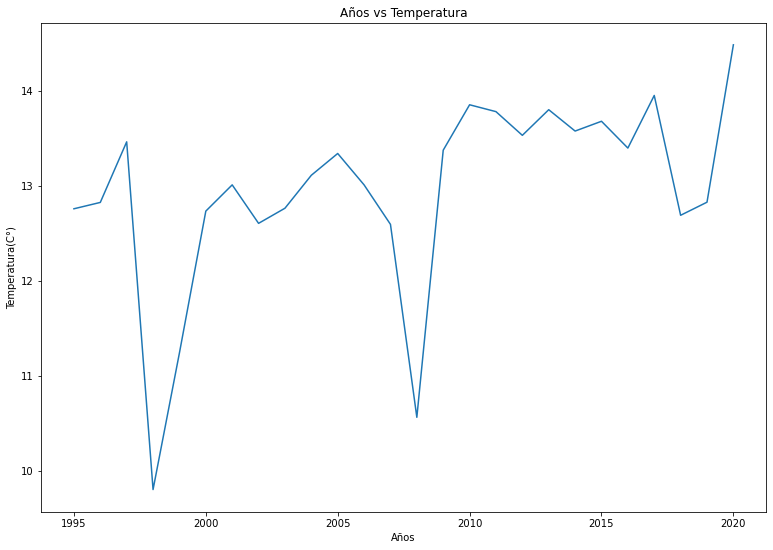

In [4]:
plt.figure(figsize=(13,9))
bogota = df['City']=="Bogota"
df1 = df[bogota].sort_values(by=['Year'])
plt.plot(df1['Year'], df1['AvgTempCelcius'])
plt.title('Años vs Temperatura')
plt.xlabel('Años')
plt.ylabel('Temperatura(C°)')

Text(0, 0.5, 'Temperatura(C°)')

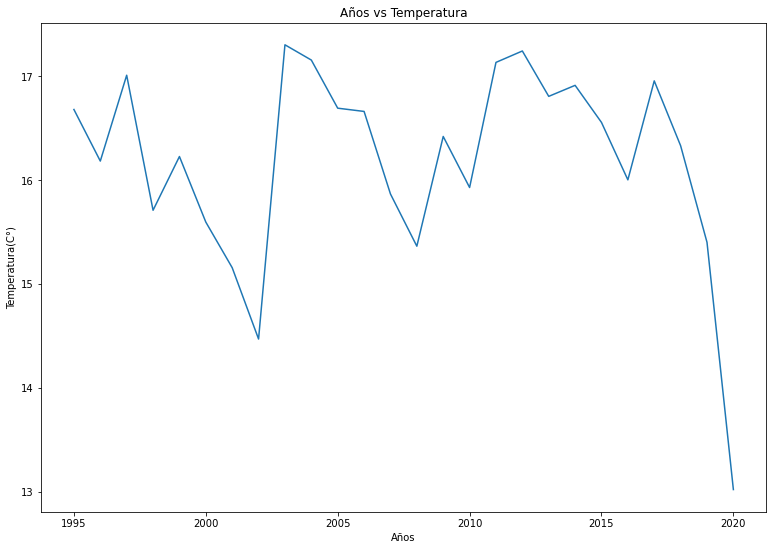

In [5]:
plt.figure(figsize=(13,9))
barcelona = df['City']=="Barcelona"
df2 = df[barcelona].sort_values(by=['Year'])
plt.plot(df2['Year'], df2['AvgTempCelcius'])
plt.title('Años vs Temperatura')
plt.xlabel('Años')
plt.ylabel('Temperatura(C°)')

Text(0, 0.5, 'Temperatura(C°)')

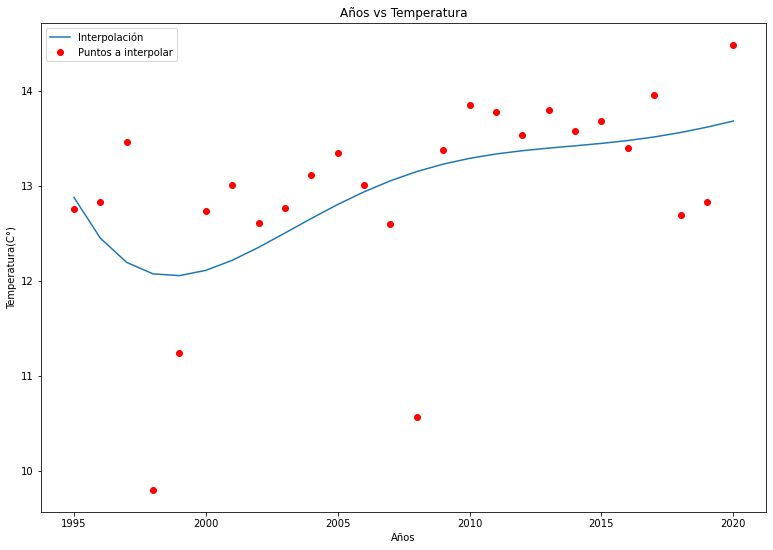

In [6]:
plt.figure(figsize=(13,9))
H = np.polynomial.hermite.Hermite.fit(df1['Year'], df1['AvgTempCelcius'], 5 )

plt.plot(df1['Year'], H(df1['Year']), label='Interpolación')
plt.plot(df1['Year'], df1['AvgTempCelcius'], 'ro',label='Puntos a interpolar')
plt.legend()
plt.title('Años vs Temperatura')
plt.xlabel('Años')
plt.ylabel('Temperatura(C°)')

Text(0, 0.5, 'Temperatura(C°)')

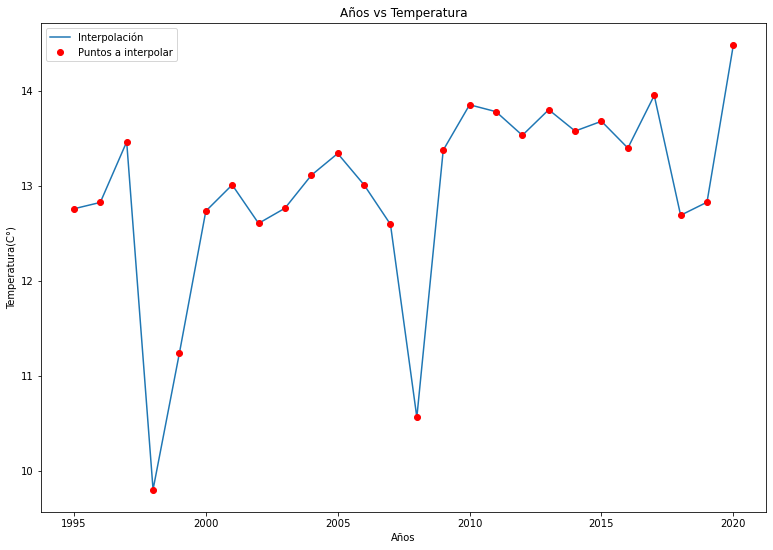

In [7]:
plt.figure(figsize=(13,9))
S = CubicSpline(df1['Year'], df1['AvgTempCelcius'])
plt.plot(df1['Year'], S(df1['Year']),label = 'Interpolación')
plt.plot(df1['Year'], df1['AvgTempCelcius'], 'ro',label = 'Puntos a interpolar')
plt.legend()
plt.title('Años vs Temperatura')
plt.xlabel('Años')
plt.ylabel('Temperatura(C°)')

In [8]:
min = optimize.fmin_powell(S, x0 = [0])
min

Optimization terminated successfully.
         Current function value: -inf
         Iterations: 1
         Function evaluations: 492


C:\Users\salin\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2555: RuntimeWarning: overflow encountered in multiply
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\salin\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2548: RuntimeWarning: overflow encountered in multiply
  tmp1 = (xb - xa) * (fb - fc)
C:\Users\salin\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2549: RuntimeWarning: overflow encountered in multiply
  tmp2 = (xb - xc) * (fb - fa)
C:\Users\salin\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2550: RuntimeWarning: invalid value encountered in subtract
  val = tmp2 - tmp1
C:\Users\salin\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2148: RuntimeWarning: invalid value encountered in subtract
  tmp1 = (x - w) * (fx - fv)
C:\Users\salin\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2149: RuntimeWarning: invalid value encountered in subtract
  tmp2 = (x - v) * (fx - fw)


array([1.07070863e+103])